## 1. 백만 개의 샘플을 가진 훈련 세트에서 (규제 없이) 훈련시킨 결정 트리의 깊이는 대략 얼마일까?

-> m개의 리프 노드를 포함한 균형이 잘 잡힌 이진 트리의 깊이는 $log_2(m)$을 반올림한 것과 같음. 이진 결정 트리를 제한을 두지 않고 훈련시키면 훈련 샘플마다 하나의 리프 노드가 되므로 어느 정도 균형이 잘 잡힌 트리가 됨.  
### 따라서 훈련 세트에 백만 개 샘플이 있다면 결정 트리 깊이는 $log_2(10^6) = 20$이 됨** 
(실제로는 완벽하게 균형잡힌 트리가 만들어지지 않기 때문에 조금 더 늘어남)

## 2. 한 노드의 지니 불순도가 보통 그 노드보다 작을까, 클까? 일반적으로 작거나 큰지, 아니면 항상 작거나 큰지?

### 한 노드의 지니 불순도는 일반적으로 부모의 불순도보다 낮음
이는 자식의 지니 불순도의 가중치 합이 최소화되는 방향으로 각 노드를 분할하는 CART 훈련 알고리즘의 비용함수 때문. 그러나 다른 자식 노드의 지니 불순도 감소량이 어떤 노드의 불순도 증가량보다 큰 경우라면 부모의 불순도보다 큰 노드가 생길 수 있음.

## 3. 결정 트리가 훈련 세트에 과적합됐다면 max_depth를 줄이는 것이 좋을까?

### 결정 트리가 훈련 세트에 과대적합됐다면 모델에 제약을 가해 규제해야 하므로 max_depth를 낮추는 것이 좋음

## 4. 결정 트리가 훈련 세트에 과소적합됐다면 입력 특성의 스케일을 조정하는 것이 좋을까?

### 결정트리는 훈련 데이터의 스케일이나 원점에 맞추어져 있는지 상관하지 않음. 
이것이 결정 트리의 장점 중 하나이고, 결정트리가 과소적합되었다고 입력특성의 스케일을 조정하는 것은 시간낭비

## 5. 백만 개의 샘플을 가진 훈련 세트에 결정 트리를 훈련시키는 데 한 시간이 걸렸다면, 천만개의 샘플을 가진 훈련 세트에 결정트리를 훈련 시키는 데 대략 얼마나 걸릴까?

결정 트리 훈련의 계산 복잡도는 $O(nxmlog(m))$.  
그러므로 훈련 세트의 크기에 10을 곱하면 훈련 시간은 $$K=\frac {(n*10m*log(10m)}{n*m*log(m)} = \frac{10*log(10m)}{log(m)}$$ 배 늘어남.
### 따라서 $m=10^6$이면 $K=11.7$ 이므로 훈련에 대략 11.7시간이 걸릴 것으로 예상

## 6. 십만 개의 샘플을 가진 훈련 세트가 있다면 presort = True로 지정하는 것이 훈련 속도를 높일까?

데이터셋의 샘플 수가 수천 개 미만일 때 훈련 세트를 사전에 정렬해 훈련 속도를 높일 수 있음.
### 100,000개의 샘플을 포함하고 있을 때 presort = True로 지정하면 훈련 속도가 매우 느려질 것임

## 7. moons 데이터셋에 결정 트리를 훈련시키고 세밀하게 튜닝

**a.** make_moons(n_samples=1000, noise=0.4)를 사용해 데이터셋을 생성

In [17]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.4, random_state=42)

In [32]:
np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

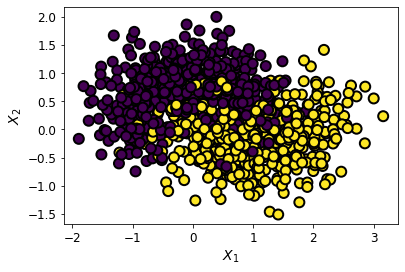

In [33]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100,
            edgecolor="k", linewidth=2)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

In [18]:
X.shape

(1000, 2)

In [19]:
y.shape

(1000,)

**b.** 이를 train_test_split()을 사용해 훈련 세트와 테스트 세트로 나눕

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**c.** DecisionTreeClassifier의 최적의 매개변수를 찾기 위해 교차 검증과 함께 그리드 탐색을 수행

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)

grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [22]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=4, random_state=42)

**d.** 찾은 매개변수를 사용해 전체 훈련 세트에 대해 모델을 훈련시키고 테스트 세트에서 성능을 측정

In [23]:
from sklearn.metrics import accuracy_score

y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.855

## 8. 랜덤 포레스트 만들기

**a.** 훈련 세트의 서브셋을 1,000개 생성. 각각은 무작위로 선택된 100개의 샘플을 담고 있음

In [24]:
from sklearn.model_selection import ShuffleSplit

n_trees = 1000
n_instances = 100

mini_sets = []

rs = ShuffleSplit(n_splits = n_trees, test_size = len(X_train) - n_instances, random_state=42)
for mini_train_index, mini_test_index in rs.split(X_train):
    X_mini_train = X_train[mini_train_index]
    y_mini_train = y_train[mini_train_index]
    mini_sets.append((X_mini_train, y_mini_train))

ShuffleSplit은 train set과 test set의 크기를 유연하게 조절해야 할 때 유용하다.
train_size와 test_size에 정수를 입력하면 해당 수 만큼 데이터포인트의 개수가 정해지며, 만일 실수를 입력하면 비율이 정해진다.

**b.** 앞에서 찾은 최적의 매개변수를 사용해 각 서브셋에 결정 트리를 훈련시킴.  
테스트 세트로 이 1,000개의 결정 트리를 평가. 더 작은 데이터셋에서 훈련되었기 때문에 이 결정 트리는 앞서 만든 결정 트리보다 성능이 떨어져 약 80%의 정확도를 냄.

In [26]:
from sklearn.base import clone
import numpy as np

forest = [clone(grid_search_cv.best_estimator_) for _ in range(n_trees)]

accuracy_scores = []

for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
    tree.fit(X_mini_train, y_mini_train)
    
    y_pred = tree.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

np.mean(accuracy_scores)

0.817115

**c.** 각 테스트 세트 샘플에 대해 1,000개의 결정 트리 예측을 만들고 다수로 나온 예측만 취함 (사이파이의 mode() 함수를 사용할 수 있음).  
그러면 테스트 세트에 대한 다수결 예측이 만들어짐.

In [27]:
Y_pred = np.empty([n_trees, len(X_test)], dtype=np.uint8)

for tree_index, tree in enumerate(forest):
    Y_pred[tree_index] = tree.predict(X_test)

In [28]:
from scipy.stats import mode

y_pred_majority_votes, n_votes = mode(Y_pred, axis=0)

d. 테스트 세트에서 이 예측을 평가.  
앞서 만든 모델보다 조금 높은(약 0.5~1.5% 정도) 정확도를 얻게 됨

In [30]:
accuracy_score(y_test, y_pred_majority_votes.reshape([-1]))

0.85